In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import ttest_ind

In [253]:
rankings = pd.read_csv('data/final_rankings.csv')

In [254]:
indicators_df = pd.read_csv('data/Indicators_final.csv')

In [255]:
indicators_df = indicators_df[indicators_df['DOES A HIGHER VALUE INCREASE POVERTY?']!='TBD']

In [256]:
indicators_df = indicators_df[['INDICATOR NAMES']]

In [257]:
df_main = pd.read_csv('data/SAP Datasets.csv')

C:\Users\06pau\AppData\Local\Temp\ipykernel_21288\2592756498.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv('data/SAP Datasets.csv')


In [258]:
df_main = df_main.merge(indicators_df, how='inner', left_on='Indicator Name', right_on='INDICATOR NAMES')

In [259]:
# Forward and backward filling
years_col = [str(i) for i in range(2000,2024)]
df_main[years_col] = df_main[years_col].apply(lambda row: row.ffill().bfill(), axis=1)

In [260]:
df_new = df_main[['Country Name', 'Country Code', 'Indicator Name', 'Topic', 'Indicator Code',
       'Unit of measure', '2022','2023']]

In [261]:
df_new = df_new.merge(rankings, on='Country Name', how='left')

In [262]:
df_new[df_new['Indicator Name'].isin(['Population, total'])]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Topic, Indicator Code, Unit of measure, 2022, 2023, mean_rank, rank]
Index: []

In [263]:
df_new = df_new[~df_new['Indicator Name'].isin(['Population, total'])]

In [264]:
df_transformed = df_new.pivot(index=['Country Name', 'Country Code', 'mean_rank','rank'], columns='Indicator Name', values=['2022', '2023'])
df_transformed.columns = [f'{year}_{indicator}' for year, indicator in df_transformed.columns]
df_transformed.reset_index(inplace=True)

In [265]:
df_transformed.to_csv('df_transformed.csv', index=False)

In [266]:
df_transformed.shape

(266, 160)

In [267]:
df_transformed

Country Name Country Code   mean_rank  rank  \
0                    Afghanistan          AFG   91.966504   226   
1    Africa Eastern and Southern          AFE  135.600571   261   
2     Africa Western and Central          AFW  120.850325   253   
3                        Albania          ALB   50.659578    85   
4                        Algeria          DZA   51.366593    87   
..                           ...          ...         ...   ...   
261           West Bank and Gaza          PSE   57.061345   111   
262                        World          WLD   94.292994   233   
263                  Yemen, Rep.          YEM   75.069671   175   
264                       Zambia          ZMB   81.969314   195   
265                     Zimbabwe          ZWE   91.355905   224   

     2022_Access to clean fuels and technologies for cooking (% of population)  \
0                                            36.100000                           
1                                            21.863139                           
2                                            22.319404                           
3                                            84.600000                           
4                                            99.700000                           
..                                                 ...                           
261                                                NaN                           
262                                          73.843840                           
263                                          48.300000                           
264                                           9.000000                           
265                                          30.800000                           

     2022_Access to clean fuels and technologies for cooking, rural (% of rural population)  \
0                                            18.500000                                        
1                                             9.261320                                        
2                                             6.709029                                        
3                                            69.000000                                        
4                                            98.900000                                        
..                                                 ...                                        
261                                                NaN                                        
262                                          54.505338                                        
263                                          26.300000                                        
264                                           2.200000                                        
265                                           7.200000                                        

     2022_Access to clean fuels and technologies for cooking, urban (% of urban population)  \
0                                            85.000000                                        
1                                            41.011132                                        
2                                            42.019407                                        
3                                            94.500000                                        
4                                            99.900000                                        
..                                                 ...                                        
261                                                NaN                                        
262                                          88.967223                                        
263                                          87.600000                                        
264                                          16.600000                                        
265                                         

The `df_transformed` DataFrame is a transformed version of the `df_new` DataFrame. Here is a detailed description:

### Shape of Data
- The `df_transformed` DataFrame has 266 rows and 178 columns.

### List of Columns
The columns in `df_transformed` include:
- `Country Name`
- `Country Code`
- `mean_rank`
- `rank`
- Various columns representing indicators for the years 2022 and 2023. Each indicator is prefixed with the year, followed by the indicator name. For example:
    - `2022_Access to clean fuels and technologies for cooking (% of population)`
    - `2023_Access to clean fuels and technologies for cooking (% of population)`
    - `2022_Access to electricity (% of population)`
    - `2023_Access to electricity (% of population)`
    - And many more...

### How It Was Created
1. **Initial DataFrames**:
     - `df_main`: Loaded from 'data/SAP Datasets.csv'.
     - `rankings`: Loaded from 'data/final_rankings.csv'.

2. **Forward and Backward Filling**:
     - The columns representing years from 2000 to 2023 in `df_main` were forward and backward filled to handle missing values.

3. **Selection of Specific Columns**:
     - A subset of columns was selected from `df_main` to create `df_new`.

4. **Merging with Rankings**:
     - `df_new` was merged with the `rankings` DataFrame on the 'Country Name' column using a left join.

5. **Filtering Out Specific Indicators**:
     - Rows with the 'Indicator Name' as 'Population, total' were filtered out from `df_new`.

6. **Pivoting the DataFrame**:
     - `df_new` was pivoted to create `df_transformed`, with 'Country Name', 'Country Code', 'mean_rank', and 'rank' as the index, and the 'Indicator Name' as columns. The values were taken from the years 2022 and 2023.
     - The columns were then renamed to include both the year and the indicator name.
     - The index was reset to convert the multi-index DataFrame back to a regular DataFrame.

7. **Saving to CSV**:
     - The `df_transformed` DataFrame was saved to 'df_transformed.csv'.

### Summary
The `df_transformed` DataFrame provides a comprehensive view of various indicators for different countries, with data for the years 2022 and 2023. It includes rankings and mean ranks for each country, along with a wide range of socio-economic and environmental indicators.

In [268]:
X = df_transformed.drop(columns=["Country Name", "Country Code", "mean_rank", "rank"])
y = df_transformed["mean_rank"]  # Target variable


In [269]:
y_rank=df_transformed['rank']

In [270]:
df = df_transformed[['Country Name','mean_rank']]

C:\Users\06pau\AppData\Local\Temp\ipykernel_21288\3062322245.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_rank'] = imputer.fit_transform(df[['mean_rank']])


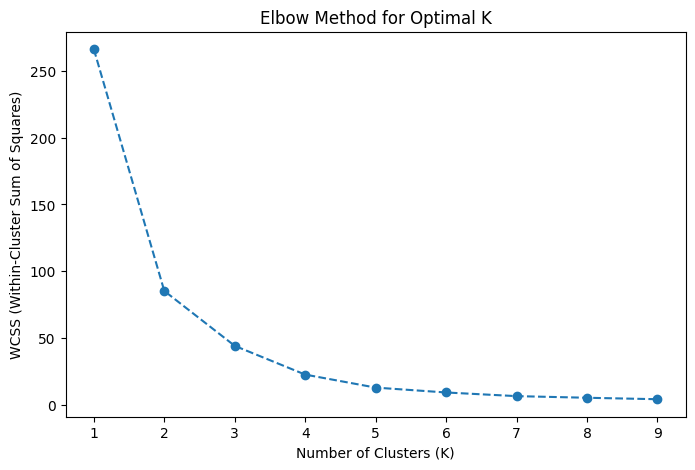

In [271]:
# Handle missing values by filling them with the mean of the column
imputer = SimpleImputer(strategy='mean')
df['mean_rank'] = imputer.fit_transform(df[['mean_rank']])

# Scale the data (K-Means is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['mean_rank']])

# Find the optimal K using Elbow Method
wcss = []
K_range = range(1, 10)  # Test clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Sum of squared distances

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [272]:
# Apply K-Means with the optimal K (adjust based on the elbow point)
optimal_k = 2  # Replace with the best K from the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Sort for better readability
df = df.sort_values(by="Cluster")

print(df[['Country Name', 'mean_rank', 'Cluster']])


                                          Country Name  mean_rank  Cluster
0                                          Afghanistan  91.966504        0
131                          Late-demographic dividend  72.655162        0
264                                             Zambia  81.969314        0
133  Latin America & Caribbean (excluding high income)  73.743898        0
134  Latin America & the Caribbean (IDA & IBRD coun...  74.486196        0
..                                                 ...        ...      ...
94                                                Guam  57.245235        1
163                                            Moldova  52.963260        1
164                                             Monaco  43.509490        1
157                                             Mexico  48.238260        1
32                                            Bulgaria  54.097244        1

[266 rows x 3 columns]


C:\Users\06pau\AppData\Local\Temp\ipykernel_21288\3926840920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X_scaled)


In [273]:
df_transformed['cluster'] = df_transformed.merge(df[['Country Name', 'Cluster']], on='Country Name', how='left')['Cluster']

In [275]:
df_transformed.groupby(['cluster']).size()

cluster
0    113
1    153
dtype: int64

In [276]:
df_transformed.to_csv('df_transformed.csv', index=False)

In [277]:
df_transformed

Country Name Country Code   mean_rank  rank  \
0                    Afghanistan          AFG   91.966504   226   
1    Africa Eastern and Southern          AFE  135.600571   261   
2     Africa Western and Central          AFW  120.850325   253   
3                        Albania          ALB   50.659578    85   
4                        Algeria          DZA   51.366593    87   
..                           ...          ...         ...   ...   
261           West Bank and Gaza          PSE   57.061345   111   
262                        World          WLD   94.292994   233   
263                  Yemen, Rep.          YEM   75.069671   175   
264                       Zambia          ZMB   81.969314   195   
265                     Zimbabwe          ZWE   91.355905   224   

     2022_Access to clean fuels and technologies for cooking (% of population)  \
0                                            36.100000                           
1                                            21.863139                           
2                                            22.319404                           
3                                            84.600000                           
4                                            99.700000                           
..                                                 ...                           
261                                                NaN                           
262                                          73.843840                           
263                                          48.300000                           
264                                           9.000000                           
265                                          30.800000                           

     2022_Access to clean fuels and technologies for cooking, rural (% of rural population)  \
0                                            18.500000                                        
1                                             9.261320                                        
2                                             6.709029                                        
3                                            69.000000                                        
4                                            98.900000                                        
..                                                 ...                                        
261                                                NaN                                        
262                                          54.505338                                        
263                                          26.300000                                        
264                                           2.200000                                        
265                                           7.200000                                        

     2022_Access to clean fuels and technologies for cooking, urban (% of urban population)  \
0                                            85.000000                                        
1                                            41.011132                                        
2                                            42.019407                                        
3                                            94.500000                                        
4                                            99.900000                                        
..                                                 ...                                        
261                                                NaN                                        
262                                          88.967223                                        
263                                          87.600000                                        
264                                          16.600000                                        
265                                         

In [278]:
df_poor = df_transformed[df_transformed["cluster"] == 0]
df_rich = df_transformed[df_transformed["cluster"] == 1]

In [279]:
df_rich.sort_values(by='mean_rank', ascending=True)

Country Name Country Code  mean_rank  rank  \
212       Singapore          SGP  25.553209     1   
235     Switzerland          CHE  26.884541     2   
40   Cayman Islands          CYM  27.838874     3   
126     Korea, Rep.          KOR  29.188156     4   
173     Netherlands          NLD  29.406586     5   
..              ...          ...        ...   ...   
93          Grenada          GRD  66.204375   149   
55          Curacao          CUW  66.729670   150   
174   New Caledonia          NCL  68.196916   151   
127          Kosovo          XKX  68.265724   152   
183  Not classified          INX        NaN   266   

     2022_Access to clean fuels and technologies for cooking (% of population)  \
212                                              100.0                           
235                                              100.0                           
40                                                 NaN                           
126                                              100.0                           
173                                              100.0                           
..                                                 ...                           
93                                                84.8                           
55                                                 NaN                           
174                                                NaN                           
127                                                NaN                           
183                                                NaN                           

     2022_Access to clean fuels and technologies for cooking, rural (% of rural population)  \
212                                             100.00                                        
235                                             100.00                                        
40                                                 NaN                                        
126                                             100.00                                        
173                                             100.00                                        
..                                                 ...                                        
93                                               84.05                                        
55                                                 NaN                                        
174                                                NaN                                        
127                                                NaN                                        
183                                                NaN                                        

     2022_Access to clean fuels and technologies for cooking, urban (% of urban population)  \
212                                              100.0                                        
235                                              100.0                                        
40                                                 NaN                                        
126                                              100.0                                        
173                                              100.0                                        
..                                                 ...                                        
93                                                93.9                                        
55                                                 NaN                                        
174                                                NaN                                        
127                                                NaN                                        
183                                                NaN                                        

     2022_Access to electricity (% of population)  \
212                                         100.0 

In [280]:
df_poor.sort_values(by='mean_rank', ascending=False)

Country Name Country Code   mean_rank  \
187                   Pacific island small states          PSS  144.611009   
100        Heavily indebted poor countries (HIPC)          HPC  141.609746   
198                      Pre-demographic dividend          PRE  139.821747   
136  Least developed countries: UN classification          LDC  139.357120   
1                     Africa Eastern and Southern          AFE  135.600571   
..                                            ...          ...         ...   
28                                       Botswana          BWA   70.632411   
89                                          Ghana          GHA   70.572031   
85                                          Gabon          GAB   70.074397   
72                                       Eswatini          SWZ   70.053659   
254                           Upper middle income          UMC   69.931082   

     rank  \
187   265   
100   264   
198   263   
136   262   
1     261   
..    ...   
28    157   
89    156   
85    155   
72    154   
254   153   

     2022_Access to clean fuels and technologies for cooking (% of population)  \
187                                          33.224883                           
100                                          16.514066                           
198                                          22.819071                           
136                                          19.988544                           
1                                            21.863139                           
..                                                 ...                           
28                                           66.000000                           
89                                           31.000000                           
85                                           90.900000                           
72                                           48.900000                           
254                                          89.459134                           

     2022_Access to clean fuels and technologies for cooking, rural (% of rural population)  \
187                                          17.001228                                        
100                                           6.565583                                        
198                                           9.877199                                        
136                                           9.890226                                        
1                                             9.261320                                        
..                                                 ...                                        
28                                           25.300000                                        
89                                           12.700000                                        
85                                           49.000000                                        
72                                           30.400000                                        
254                                          77.341253                                        

     2022_Access to clean fuels and technologies for cooking, urban (% of urban population)  \
187                                          58.012982                                        
100                                          32.251006                                        
198                                          41.158037                                        
136                                          38.596563                                        
1                                            41.011132                                        
..                                                 ...                                        
28                                           86.900000                                        
89                                           45.700000   

In [281]:
df_poor[['2023_Terms of trade adjustment (constant LCU)']]

2023_Terms of trade adjustment (constant LCU)
0                                    -1.822453e+10
1                                              NaN
2                                              NaN
5                                     3.960118e+06
7                                    -1.172880e+11
..                                             ...
257                                   5.364534e+08
262                                            NaN
263                                   2.224493e+09
264                                   0.000000e+00
265                                  -5.517112e+01

[113 rows x 1 columns]

In [ ]:
# Drop non-indicator columns
indicator_columns = df_poor.drop(columns=["Country Name", "Country Code", "cluster", "mean_rank", "rank"]).columns

# Compute mean and standard deviation for poor and rich clusters
mean_poor = df_poor[indicator_columns].mean()
mean_rich = df_rich[indicator_columns].mean()
std_poor = df_poor[indicator_columns].std()
std_rich = df_rich[indicator_columns].std()

# Compute absolute difference
diff = abs(mean_poor - mean_rich)

# Combine results into a DataFrame with indicator names
variability_df = pd.DataFrame({
    "Indicator_Name": indicator_columns,  # Adding the missing indicator column
    "AVG_Poor": mean_poor.values,  
    "AVG_Rich": mean_rich.values,  
    "Std_Poor": std_poor.values,  
    "Std_Rich": std_rich.values,  
    "DIFF": diff.values
})

# Sort by the largest difference between poor and rich clusters
variability_df = variability_df.sort_values(by="DIFF", ascending=False)

In [283]:
variability_df

Indicator_Name      AVG_Poor  \
144      2023_Terms of trade adjustment (constant LCU)  1.852277e+12   
38        2022_Compensation of employees (current LCU)  1.173932e+12   
116       2023_Compensation of employees (current LCU)  1.187117e+12   
66       2022_Terms of trade adjustment (constant LCU)  8.265183e+11   
89   2023_Adjusted savings: education expenditure (...  2.383326e+09   
..                                                 ...           ...   
70   2022_Unemployment, total (% of total labor for...  7.361403e+00   
114   2023_Community health workers (per 1,000 people)  4.462765e-01   
36    2022_Community health workers (per 1,000 people)  4.462765e-01   
130  2023_Literacy rate, youth (ages 15-24), gender...  9.536670e-01   
52   2022_Literacy rate, youth (ages 15-24), gender...  9.536670e-01   

         AVG_Rich      Std_Poor      Std_Rich          DIFF  
144 -1.138342e+13  8.097641e+12  1.232529e+14  1.323569e+13  
38   9.132286e+12  2.348095e+12  5.002227e+13  7.958354e+12  
116  9.132286e+12  2.370087e+12  5.002227e+13  7.945169e+12  
66  -6.237150e+12  4.613875e+12  8.850703e+13  7.063668e+12  
89   2.759106e+10  1.158122e+10  1.004457e+11  2.520773e+10  
..            ...           ...           ...           ...  
70   6.688726e+00  5.936654e+00  4.685416e+00  6.726774e-01  
114  3.941600e-01  5.867974e-01  4.373382e-01  5.211654e-02  
36   3.941600e-01  5.867974e-01  4.373382e-01  5.211654e-02  
130  1.003968e+00  9.901096e-02  2.421185e-02  5.030074e-02  
52   1.003962e+00  9.901096e-02  2.421278e-02  5.029544e-02  

[156 rows x 6 columns]

In [ ]:
# Prepare an empty list to store results
ttest_results = []

# Iterate over each indicator (numerical columns only)
for col in df_poor.select_dtypes(include=['number']).columns:
    if col not in ['mean_rank', 'rank', 'cluster']:
        t_stat, p_value = ttest_ind(df_poor[col], df_rich[col], nan_policy='omit', equal_var=False)  # Handle NaNs and unequal variances
        
        # Store results
        ttest_results.append({
            "Indicator_Name": col,
            "p_value": p_value,
            "conclusion": "mean differs" if p_value <= 0.05 else "similar mean"
        })

# Convert to DataFrame
ttest_df = pd.DataFrame(ttest_results)


In [285]:
same_mean = ttest_df[~(ttest_df['conclusion']=='mean differs')]

In [286]:
same_mean['Indicator_Name'] = same_mean['Indicator_Name'].apply(lambda x: x[5:])

C:\Users\06pau\AppData\Local\Temp\ipykernel_21288\1577588198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_mean['Indicator_Name'] = same_mean['Indicator_Name'].apply(lambda x: x[5:])


In [296]:
same_mean.groupby(['Indicator_Name']).size() #unsignificant indicators

Indicator_Name
Adequacy of social safety net programs (% of total welfare of beneficiary households)        2
Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)    2
Community health workers (per 1,000 people)                                                  2
Compensation of employees (current LCU)                                                      2
Expenditure on tertiary education (% of government expenditure on education)                 2
Multilateral debt service (% of public and publicly guaranteed debt service)                 2
Proportion of people living below 50 percent of median income (%)                            2
Terms of trade adjustment (constant LCU)                                                     2
Unemployment with basic education (% of total labor force with basic education)              2
Unemployment, total (% of total labor force) (national estimate)                             2
dtype: int64

In [288]:
ttest_df = ttest_df[~(ttest_df['conclusion']=='similar mean')]

In [289]:
ttest_df[ttest_df['Indicator_Name']=='2023_Terms of trade adjustment (constant LCU)']

Empty DataFrame
Columns: [Indicator_Name, p_value, conclusion]
Index: []

In [290]:
variability_df.sort_values(by='DIFF', ascending=False).head(20)

Indicator_Name      AVG_Poor  \
144      2023_Terms of trade adjustment (constant LCU)  1.852277e+12   
38        2022_Compensation of employees (current LCU)  1.173932e+12   
116       2023_Compensation of employees (current LCU)  1.187117e+12   
66       2022_Terms of trade adjustment (constant LCU)  8.265183e+11   
89   2023_Adjusted savings: education expenditure (...  2.383326e+09   
11   2022_Adjusted savings: education expenditure (...  2.383326e+09   
111               2023_Children out of school, primary  1.659403e+06   
33                2022_Children out of school, primary  1.635135e+06   
34        2022_Children out of school, primary, female  8.844280e+05   
112       2023_Children out of school, primary, female  8.796309e+05   
35          2022_Children out of school, primary, male  8.598649e+05   
113         2023_Children out of school, primary, male  8.496859e+05   
88   2023_Adjusted net national income per capita (...  2.766853e+03   
10   2022_Adjusted net national income per capita (...  2.766853e+03   
42   2022_Current health expenditure per capita (cu...  2.167469e+02   
120  2023_Current health expenditure per capita (cu...  2.167469e+02   
1    2022_Access to clean fuels and technologies fo...  2.782307e+01   
79   2023_Access to clean fuels and technologies fo...  2.782307e+01   
78   2023_Access to clean fuels and technologies fo...  4.067556e+01   
0    2022_Access to clean fuels and technologies fo...  4.067556e+01   

         AVG_Rich      Std_Poor      Std_Rich          DIFF  
144 -1.138342e+13  8.097641e+12  1.232529e+14  1.323569e+13  
38   9.132286e+12  2.348095e+12  5.002227e+13  7.958354e+12  
116  9.132286e+12  2.370087e+12  5.002227e+13  7.945169e+12  
66  -6.237150e+12  4.613875e+12  8.850703e+13  7.063668e+12  
89   2.759106e+10  1.158122e+10  1.004457e+11  2.520773e+10  
11   2.759106e+10  1.158122e+10  1.004457e+11  2.520773e+10  
111  8.352831e+04  5.405274e+06  2.174547e+05  1.575874e+06  
33   8.498151e+04  5.418500e+06  2.226786e+05  1.550153e+06  
34   5.196874e+04  2.685960e+06  1.563838e+05  8.324592e+05  
112  5.100785e+04  2.675511e+06  1.546057e+05  8.286230e+05  
35   5.215873e+04  2.766651e+06  1.347735e+05  8.077061e+05  
113  5.086249e+04  2.765515e+06  1.325909e+05  7.988234e+05  
88   1.855265e+04  2.795349e+03  1.788870e+04  1.578579e+04  
10   1.855265e+04  2.795349e+03  1.788870e+04  1.578579e+04  
42   2.216628e+03  2.613343e+02  2.617791e+03  1.999881e+03  
120  2.216628e+03  2.613343e+02  2.617791e+03  1.999881e+03  
1    8.702196e+01  3.095364e+01  2.309540e+01  5.919889e+01  
79   8.702196e+01  3.095364e+01  2.309540e+01  5.919889e+01  
78   9.218502e+01  3.290997e+01  1.500252e+01  5.150945e+01  
0    9.218502e+01  3.290997e+01  1.500252e+01  5.150945e+01

In [291]:
# Ensure column names match exactly
ttest_df.rename(columns={"Indicator_name": "Indicator_Name"}, inplace=True)

# Merge t-test results with variability data
merged_df = ttest_df.merge(variability_df, on="Indicator_Name", how="left")


In [292]:
merged_df.to_csv('feature_importance_unsupervised.csv', index=False)

In [293]:
merged_df

Indicator_Name       p_value  \
0    2022_Access to clean fuels and technologies fo...  1.654890e-31   
1    2022_Access to clean fuels and technologies fo...  8.033503e-39   
2    2022_Access to clean fuels and technologies fo...  4.464764e-22   
3         2022_Access to electricity (% of population)  6.343746e-21   
4    2022_Access to electricity, rural (% of rural ...  1.270726e-22   
..                                                 ...           ...   
131  2023_Wage and salaried workers, male (% of mal...  7.626345e-34   
132  2023_Wage and salaried workers, total (% of to...  6.485324e-37   
133      2023_Wanted fertility rate (births per woman)  1.156635e-10   
134  2023_Women who were first married by age 15 (%...  6.113330e-09   
135  2023_Women who were first married by age 18 (%...  7.300431e-10   

       conclusion   AVG_Poor   AVG_Rich   Std_Poor   Std_Rich       DIFF  
0    mean differs  40.675563  92.185017  32.909972  15.002521  51.509454  
1    mean differs  27.823070  87.021957  30.953641  23.095398  59.198887  
2    mean differs  55.468909  96.009055  34.530375  10.093240  40.540146  
3    mean differs  70.474499  99.536275  26.443961   1.989823  29.061776  
4    mean differs  56.952511  99.160294  35.860715   3.883371  42.207783  
..            ...        ...        ...        ...        ...        ...  
131  mean differs  41.211343  73.718947  18.584618  14.521307  32.507604  
132  mean differs  37.920404  75.535189  20.237483  15.433748  37.614785  
133  mean differs   3.611406   2.090909   1.214043   0.593544   1.520497  
134  mean differs   7.265672   2.210000   5.921828   2.573113   5.055672  
135  mean differs  27.801493  13.217808  14.994691   9.871513  14.583684  

[136 rows x 8 columns]

In [294]:
variability_df.head(20)

Indicator_Name      AVG_Poor  \
144      2023_Terms of trade adjustment (constant LCU)  1.852277e+12   
38        2022_Compensation of employees (current LCU)  1.173932e+12   
116       2023_Compensation of employees (current LCU)  1.187117e+12   
66       2022_Terms of trade adjustment (constant LCU)  8.265183e+11   
89   2023_Adjusted savings: education expenditure (...  2.383326e+09   
11   2022_Adjusted savings: education expenditure (...  2.383326e+09   
111               2023_Children out of school, primary  1.659403e+06   
33                2022_Children out of school, primary  1.635135e+06   
34        2022_Children out of school, primary, female  8.844280e+05   
112       2023_Children out of school, primary, female  8.796309e+05   
35          2022_Children out of school, primary, male  8.598649e+05   
113         2023_Children out of school, primary, male  8.496859e+05   
88   2023_Adjusted net national income per capita (...  2.766853e+03   
10   2022_Adjusted net national income per capita (...  2.766853e+03   
42   2022_Current health expenditure per capita (cu...  2.167469e+02   
120  2023_Current health expenditure per capita (cu...  2.167469e+02   
1    2022_Access to clean fuels and technologies fo...  2.782307e+01   
79   2023_Access to clean fuels and technologies fo...  2.782307e+01   
0    2022_Access to clean fuels and technologies fo...  4.067556e+01   
78   2023_Access to clean fuels and technologies fo...  4.067556e+01   

         AVG_Rich      Std_Poor      Std_Rich          DIFF  
144 -1.138342e+13  8.097641e+12  1.232529e+14  1.323569e+13  
38   9.132286e+12  2.348095e+12  5.002227e+13  7.958354e+12  
116  9.132286e+12  2.370087e+12  5.002227e+13  7.945169e+12  
66  -6.237150e+12  4.613875e+12  8.850703e+13  7.063668e+12  
89   2.759106e+10  1.158122e+10  1.004457e+11  2.520773e+10  
11   2.759106e+10  1.158122e+10  1.004457e+11  2.520773e+10  
111  8.352831e+04  5.405274e+06  2.174547e+05  1.575874e+06  
33   8.498151e+04  5.418500e+06  2.226786e+05  1.550153e+06  
34   5.196874e+04  2.685960e+06  1.563838e+05  8.324592e+05  
112  5.100785e+04  2.675511e+06  1.546057e+05  8.286230e+05  
35   5.215873e+04  2.766651e+06  1.347735e+05  8.077061e+05  
113  5.086249e+04  2.765515e+06  1.325909e+05  7.988234e+05  
88   1.855265e+04  2.795349e+03  1.788870e+04  1.578579e+04  
10   1.855265e+04  2.795349e+03  1.788870e+04  1.578579e+04  
42   2.216628e+03  2.613343e+02  2.617791e+03  1.999881e+03  
120  2.216628e+03  2.613343e+02  2.617791e+03  1.999881e+03  
1    8.702196e+01  3.095364e+01  2.309540e+01  5.919889e+01  
79   8.702196e+01  3.095364e+01  2.309540e+01  5.919889e+01  
0    9.218502e+01  3.290997e+01  1.500252e+01  5.150945e+01  
78   9.218502e+01  3.290997e+01  1.500252e+01  5.150945e+01